<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/funciones_trazado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Indicador poblacional por país de la WDI:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#sns.set_style('darkgrid')
pobl= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/Population.csv')
pobl.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [ ]:
# Países de norteamerica
north_america= pobl[(pobl['Country Name']=='Mexico') | (pobl['Country Name']=='United States') | (pobl['Country Name']=='Canada')]
north_america.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
33,Canada,CAN,17909009.0,18271000.0,18614000.0,18964000.0,19325000.0,19678000.0,20048000.0,20412000.0,...,34004889.0,34339328.0,34714222.0,35082954.0,35437435.0,35702908.0,36109487.0,36543321.0,37057765.0,37589262.0
152,Mexico,MEX,37771859.0,38966056.0,40195319.0,41462369.0,42771079.0,44123853.0,45519737.0,46956208.0,...,114092963.0,115695473.0,117274155.0,118827161.0,120355128.0,121858258.0,123333376.0,124777324.0,126190788.0,127575529.0
249,United States,USA,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0


Ahora se quiere construir un gráfico para comparar las poblaciones de los tres países a lo largo del tiempo:

In [ ]:
#borramos columnas que no hacen falta
north_america=north_america.drop('Country Code',axis=1)
# Colocamos los nombres de los países como indices
north_america.set_index('Country Name',inplace=True)
# hacemos la transpuesta del dataframe para poder graficar como queremos
north_america=north_america.T
north_america.head()

Country Name,Canada,Mexico,United States
1960,17909009.0,37771859.0,180671000.0
1961,18271000.0,38966056.0,183691000.0
1962,18614000.0,40195319.0,186538000.0
1963,18964000.0,41462369.0,189242000.0
1964,19325000.0,42771079.0,191889000.0


In [ ]:
#Para hacerlo más entendible cambiamos nombre del índice
north_america.index.name='Año'
north_america.columns.name= ''
north_america.head()

,Canada,Mexico,United States
Año,,,
1960,17909009.0,37771859.0,180671000.0
1961,18271000.0,38966056.0,183691000.0
1962,18614000.0,40195319.0,186538000.0
1963,18964000.0,41462369.0,189242000.0
1964,19325000.0,42771079.0,191889000.0


Graficamos con tres metodos de Python: Matplotlib, Pandas y Seaborn

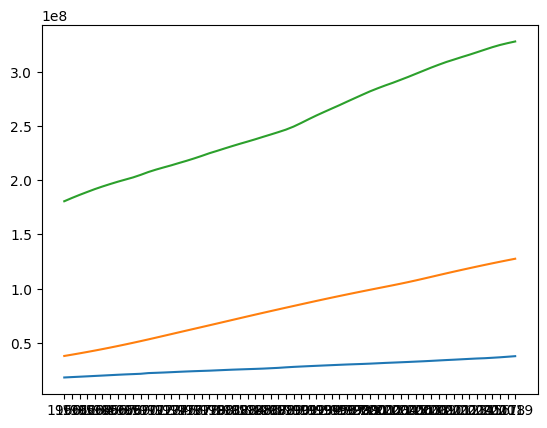

In [ ]:
#Matplotlib
plt.plot(north_america.index,north_america.values)

<Axes: xlabel='Año'>

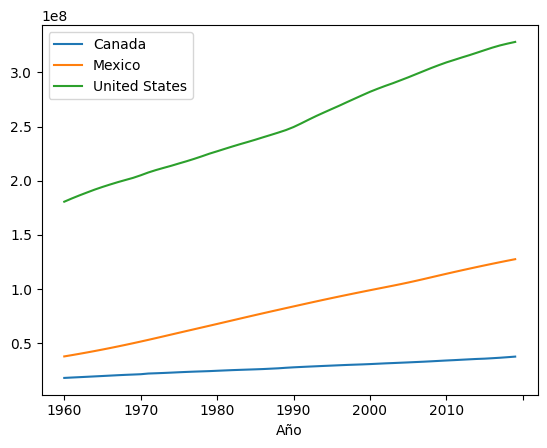

In [ ]:
#Con Pandas
north_america.plot()

([<matplotlib.axis.XTick at 0x7b34a9733400>,
 [Text(0, 0, '1960'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010')])

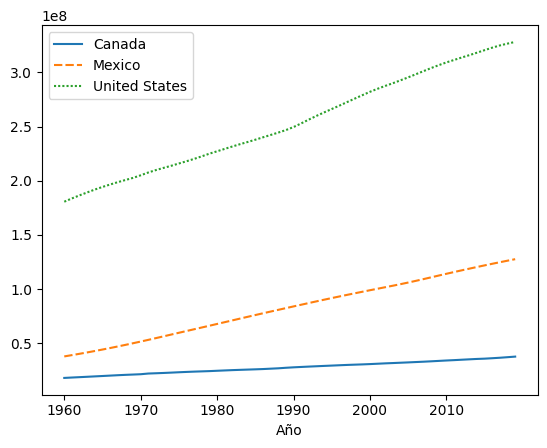

In [ ]:
#con Seaborn
sns.lineplot(data=north_america)
plt.xticks(np.arange(0,len(north_america+1),10))

([<matplotlib.axis.XTick at 0x7b34a94ce7d0>,
 [Text(0, 0, '1960'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010')])

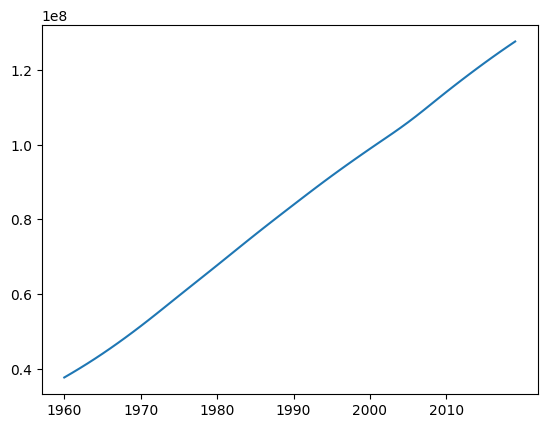

In [ ]:
# Otra manera de graficar con Matplotlib
plt.plot(north_america.index,'Mexico',data=north_america)
plt.xticks(np.arange(0,len(north_america+1),10))

<Axes: xlabel='Año'>

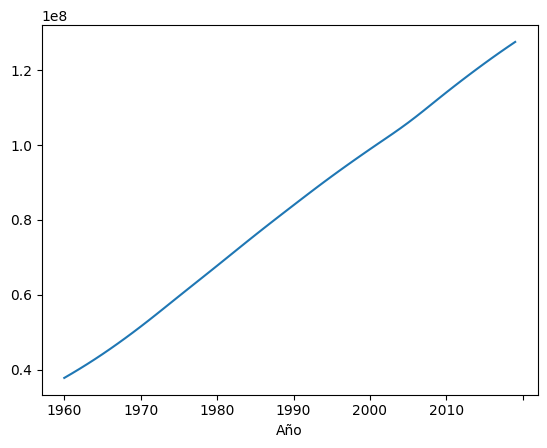

In [ ]:
#Pandas para solo una columna
north_america['Mexico'].plot()

([<matplotlib.axis.XTick at 0x7b34a95a9000>,
 [Text(0, 0, '1960'),
  Text(10, 0, '1970'),
  Text(20, 0, '1980'),
  Text(30, 0, '1990'),
  Text(40, 0, '2000'),
  Text(50, 0, '2010')])

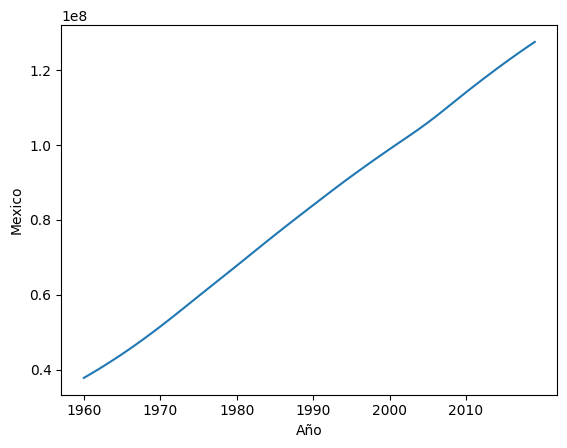

In [ ]:
# lo mismo con Seaborn
#sns.lineplot(x=north_america.index,
#y=north_america['Mexico'])
#o
sns.lineplot(x=north_america.index,
y='Mexico',data=north_america)
plt.xticks(np.arange(0,len(north_america+1),10))

Ahora vamos a jugar e incluir los datos de metadata.csv . Este archivo contiene los países del indicador de población, categorizados por la región de ingresos al que pertenecen:

In [ ]:
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/1698423984078-Metadata.csv')
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [ ]:
#juntamos datos
merge_df = pd.merge(left=metadata, right=pobl,left_on='Country Code', right_on='Country Code')
#nota que el merge se hizo por el Country Code
merge_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,54211.0,55438.0,56225.0,56695.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,AFG,South Asia,Low income,NaN,Afghanistan,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,Angola,5454933.0,5531472.0,5608539.0,5679458.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,Albania,1608800.0,1659800.0,1711319.0,1762621.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,AND,Europe & Central Asia,High income,NaN,Andorra,Andorra,13411.0,14375.0,15370.0,16412.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


Ahora vamos a sacar el total de población por región para el año 2019:

In [ ]:
region_pobl=merge_df.groupby(['Region']).sum()[['2019']]
region_pobl

<ipython-input-24-b902c5a72075>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_pobl=merge_df.groupby(['Region']).sum()[['2019']]


,2019
Region,
East Asia & Pacific,2.317037e+09
Europe & Central Asia,9.211401e+08
Latin America & Caribbean,6.464308e+08
Middle East & North Africa,4.567074e+08
North America,3.658927e+08
South Asia,1.835777e+09
Sub-Saharan Africa,1.103461e+09


Gráficamos con Pandas y personalizamos con **kwargs y las funciones de la interfaz pyplot de Matplotlib:

Text(0.5, 0, 'Región')

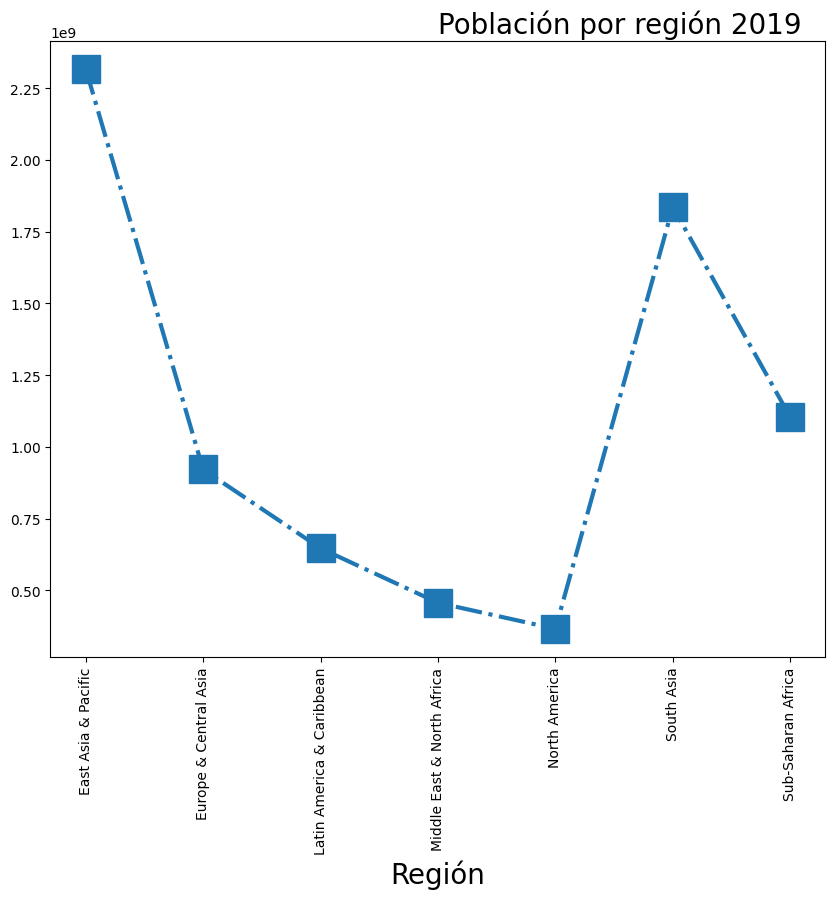

In [ ]:
region_pobl.plot(rot=90,figsize=(10,8),marker='s',markersize=20,linestyle='-.',linewidth=3,legend=False)
plt.title('Población por región 2019',fontsize=20, horizontalalignment='left')
plt.xlabel('Región',fontsize=20)

Gráfico de barras

In [ ]:

paises5=pobl.loc[(pobl['Country Name']== 'United States') | (pobl['Country Name'] == 'Mexico') | (pobl['Country Name'] == 'Somalia') | (pobl['Country Name'] == 'China') | (pobl['Country Name'] == 'India')]
paises5.index=paises5['Country Code']
paises5.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Code,,,,,,,,,,,,,,,,,,,,,
CHN,China,CHN,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,735400000.0,754550000.0,...,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09
IND,India,IND,450547679.0,459642165.0,469077190.0,478825608.0,488848135.0,499123324.0,509631500.0,520400576.0,...,1.234281e+09,1.250289e+09,1.265783e+09,1.280846e+09,1.295604e+09,1.310152e+09,1.324510e+09,1.338659e+09,1.352617e+09,1.366418e+09
MEX,Mexico,MEX,37771859.0,38966056.0,40195319.0,41462369.0,42771079.0,44123853.0,45519737.0,46956208.0,...,1.140930e+08,1.156955e+08,1.172742e+08,1.188272e+08,1.203551e+08,1.218583e+08,1.233334e+08,1.247773e+08,1.261908e+08,1.275755e+08
SOM,Somalia,SOM,2755972.0,2814118.0,2874218.0,2936477.0,3001158.0,3068459.0,3143648.0,3227841.0,...,1.204388e+07,1.237630e+07,1.271551e+07,1.306371e+07,1.342358e+07,1.379720e+07,1.418561e+07,1.458912e+07,1.500815e+07,1.544290e+07
USA,United States,USA,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,...,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08


In [ ]:
ppp=pobl.loc[(pobl['Country Code'] == 'CAN') | (pobl['Country Code']== 'DEU') | (pobl['Country Code']== 'JPN') | (pobl['Country Code']== 'MEX') | (pobl['Country Code']== 'USA') | (pobl['Country Code']== 'NGA')]
ppp.index=ppp['Country Code']
ppp=pd.concat([ppp['Country Name'],ppp['2019']],axis=1)

<BarContainer object of 6 artists>

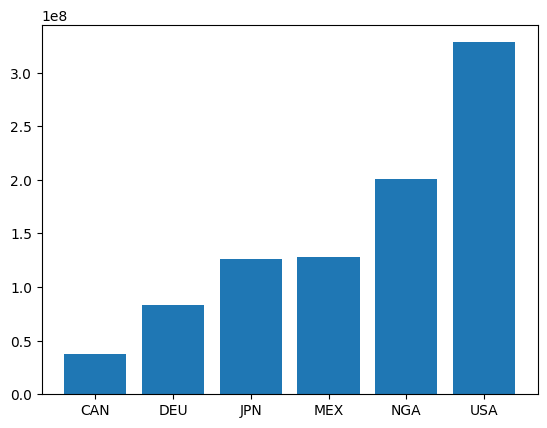

In [ ]:
#matplotlib
plt.bar(ppp.index,'2019',data=ppp)
#plt.xticks(rotation=45,fontsize=16)

<Axes: xlabel='Country Code'>

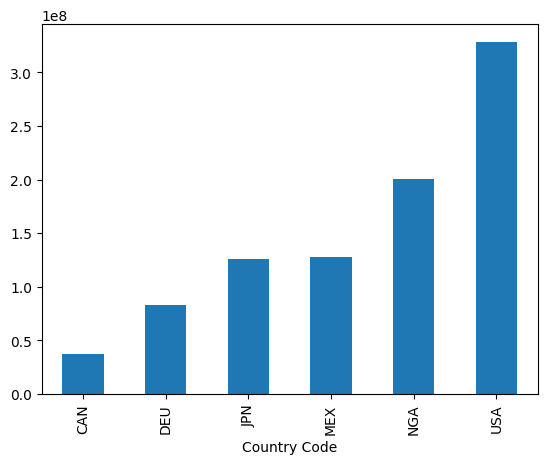

In [ ]:
ppp['2019'].plot(kind='bar')

#o

#region_pobl['2019'].plot.bar()

<Axes: xlabel='Country Code', ylabel='2019'>

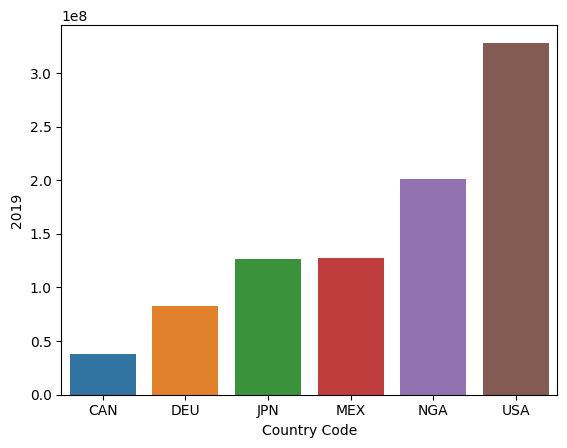

In [ ]:
sns.barplot(x=ppp.index,y='2019',data=ppp,hue=ppp.index)

#o

#sns.catplot(kind='bar',x=ppp.index,y='2019',data=ppp)


<ipython-input-81-74a2530fa1ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2019',y='Country Name',data=ppp,orient='h',palette='pastel')


<Axes: xlabel='2019', ylabel='Country Name'>

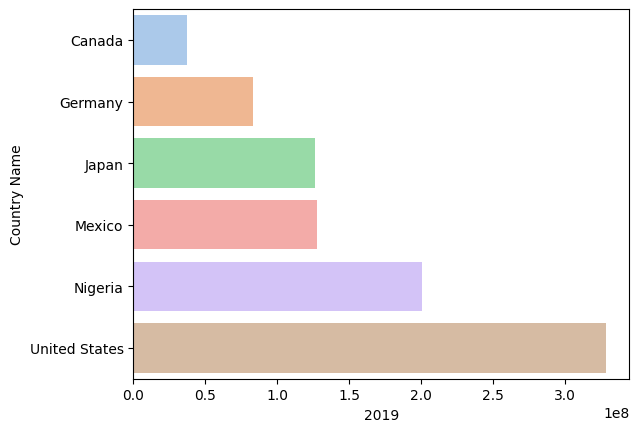

In [ ]:
# grafico de barra horizontal
sns.barplot(x='2019',y='Country Name',data=ppp,orient='h',palette='pastel')